In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("voice.csv")
data

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0     0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1     0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2     0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3     0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4     0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   
5     0.132786  0.079557  0.119090  0.067958  0.209592  0.141634   1.932562   
6     0.150762  0.074463  0.160106  0.092899  0.205718  0.112819   1.530643   
7     0.160514  0.076767  0.144337  0.110532  0.231962  0.121430   1.397156   
8     0.142239  0.078018  0.138587  0.088206  0.208587  0.120381   1.099746   
9     0.134329  0.080350  0.121451  0.075580  0.201957  0.126377   1.190368   
10    0.157021  0.071943  0.168160  0.101430  0.216740  0.115310   0.979442   
11    0.138551  0.077054  0.127527  0.087314  0.202739  0.115426   1.626770   
12    0.137343  0.080877  0.124263  0.083145  0.209227  0.126082   1.378728   
13    0.181225  0.060042  0.190953  0.128839  0.229532  0.100693   1.369430   
14    0.183115  0.066982  0.191233  0.129149  0.240152  0.111004   3.568104   
15    0.174272  0.069411  0.190874  0.115602  0.228279  0.112677   4.485038   
16    0.190846  0.065790  0.207951  0.132280  0.244357  0.112076   1.562304   
17    0.171247  0.074872  0.152807  0.122391  0.243617  0.121227   3.207170   
18    0.168346  0.074121  0.145618  0.115756  0.239824  0.124068   2.704335   
19    0.173631  0.073352  0.153569  0.123680  0.244234  0.120554   2.804975   
20    0.172754  0.076903  0.177736  0.120070  0.245368  0.125298   2.967765   
21    0.181015  0.074369  0.169299  0.128673  0.254175  0.125502   2.587325   
22    0.163536  0.072449  0.145543  0.113930  0.227449  0.113519   3.587650   
23    0.170213  0.075105  0.146053  0.123989  0.250126  0.126137   2.816793   
24    0.160422  0.076615  0.144824  0.120924  0.237244  0.116319   6.253208   
25    0.164700  0.075362  0.147018  0.118698  0.240475  0.121777   4.208608   
26    0.169579  0.075635  0.186468  0.116706  0.238549  0.121843   4.269923   
27    0.169021  0.071778  0.143168  0.125801  0.248315  0.122515   3.079273   
28    0.167340  0.072841  0.141739  0.122174  0.240000  0.117826   2.192126   
29    0.180528  0.070867  0.142385  0.129541  0.252477  0.122936   2.799969   
...        ...       ...       ...       ...       ...       ...        ...   
3138  0.114477  0.081973  0.090199  0.041095  0.199900  0.158806   1.103680   
3139  0.112769  0.074424  0.094248  0.049183  0.183235  0.134052   0.945953   
3140  0.126439  0.079412  0.127325  0.046889  0.198993  0.152103   1.452173   
3141  0.117350  0.090035  0.109478  0.024017  0.203946  0.179929   2.610623   
3142  0.104793  0.085201  0.077886  0.028388  0.186101  0.157712   2.419127   
3143  0.127633  0.084931  0.158892  0.034531  0.201430  0.166899   1.591174   
3144  0.091250  0.086956  0.048191  0.015193  0.179043  0.163851   3.089787   
3145  0.082404  0.085136  0.035114  0.016920  0.152827  0.135906   2.570944   
3146  0.124695  0.080989  0.131882  0.042033  0.197268  0.155234   1.970756   
3147  0.131566  0.084354  0.131889  0.053093  0.196147  0.143055   2.243370   
3148  0.108888  0.092021  0.070063  0.022520  0.201180  0.178660   2.235435   
3149  0.090445  0.079045  0.059358  0.020893  0.167727  0.146834   2.187161   
3150  0.137507  0.091521  0.161298  0.043547  0.221260  0.177713   1.119608   
3151  0.113148  0.090335  0.084335  0.026622  0.198830  0.172207   2.258273   
3152  0.149731  0.082852  0.180932  0.060212  0.219788  0.159576   1.240037   
3153  0.189614  0.035933  0.194116  0.168434  0.205289  0.036855   2.724415   
3154  0.200097  0.045533  0.203796  0.176581  0.232133  0.055552   1.160197   
3155  0.178573  0.046679  0.164388  0.149309  0.204601  0.055293   3.066668   
3156  0.201806  0.036057  0.201622  0.178165  0.227872  

In [52]:
x = data.iloc[:,:-1]
x

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0     0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1     0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2     0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3     0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4     0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   
5     0.132786  0.079557  0.119090  0.067958  0.209592  0.141634   1.932562   
6     0.150762  0.074463  0.160106  0.092899  0.205718  0.112819   1.530643   
7     0.160514  0.076767  0.144337  0.110532  0.231962  0.121430   1.397156   
8     0.142239  0.078018  0.138587  0.088206  0.208587  0.120381   1.099746   
9     0.134329  0.080350  0.121451  0.075580  0.201957  0.126377   1.190368   
10    0.157021  0.071943  0.168160  0.101430  0.216740  0.115310   0.979442   
11    0.138551  0.077054  0.127527  0.087314  0.202739  0.115426   1.626770   
12    0.137343  0.080877  0.124263  0.083145  0.209227  0.126082   1.378728   
13    0.181225  0.060042  0.190953  0.128839  0.229532  0.100693   1.369430   
14    0.183115  0.066982  0.191233  0.129149  0.240152  0.111004   3.568104   
15    0.174272  0.069411  0.190874  0.115602  0.228279  0.112677   4.485038   
16    0.190846  0.065790  0.207951  0.132280  0.244357  0.112076   1.562304   
17    0.171247  0.074872  0.152807  0.122391  0.243617  0.121227   3.207170   
18    0.168346  0.074121  0.145618  0.115756  0.239824  0.124068   2.704335   
19    0.173631  0.073352  0.153569  0.123680  0.244234  0.120554   2.804975   
20    0.172754  0.076903  0.177736  0.120070  0.245368  0.125298   2.967765   
21    0.181015  0.074369  0.169299  0.128673  0.254175  0.125502   2.587325   
22    0.163536  0.072449  0.145543  0.113930  0.227449  0.113519   3.587650   
23    0.170213  0.075105  0.146053  0.123989  0.250126  0.126137   2.816793   
24    0.160422  0.076615  0.144824  0.120924  0.237244  0.116319   6.253208   
25    0.164700  0.075362  0.147018  0.118698  0.240475  0.121777   4.208608   
26    0.169579  0.075635  0.186468  0.116706  0.238549  0.121843   4.269923   
27    0.169021  0.071778  0.143168  0.125801  0.248315  0.122515   3.079273   
28    0.167340  0.072841  0.141739  0.122174  0.240000  0.117826   2.192126   
29    0.180528  0.070867  0.142385  0.129541  0.252477  0.122936   2.799969   
...        ...       ...       ...       ...       ...       ...        ...   
3138  0.114477  0.081973  0.090199  0.041095  0.199900  0.158806   1.103680   
3139  0.112769  0.074424  0.094248  0.049183  0.183235  0.134052   0.945953   
3140  0.126439  0.079412  0.127325  0.046889  0.198993  0.152103   1.452173   
3141  0.117350  0.090035  0.109478  0.024017  0.203946  0.179929   2.610623   
3142  0.104793  0.085201  0.077886  0.028388  0.186101  0.157712   2.419127   
3143  0.127633  0.084931  0.158892  0.034531  0.201430  0.166899   1.591174   
3144  0.091250  0.086956  0.048191  0.015193  0.179043  0.163851   3.089787   
3145  0.082404  0.085136  0.035114  0.016920  0.152827  0.135906   2.570944   
3146  0.124695  0.080989  0.131882  0.042033  0.197268  0.155234   1.970756   
3147  0.131566  0.084354  0.131889  0.053093  0.196147  0.143055   2.243370   
3148  0.108888  0.092021  0.070063  0.022520  0.201180  0.178660   2.235435   
3149  0.090445  0.079045  0.059358  0.020893  0.167727  0.146834   2.187161   
3150  0.137507  0.091521  0.161298  0.043547  0.221260  0.177713   1.119608   
3151  0.113148  0.090335  0.084335  0.026622  0.198830  0.172207   2.258273   
3152  0.149731  0.082852  0.180932  0.060212  0.219788  0.159576   1.240037   
3153  0.189614  0.035933  0.194116  0.168434  0.205289  0.036855   2.724415   
3154  0.200097  0.045533  0.203796  0.176581  0.232133  0.055552   1.160197   
3155  0.178573  0.046679  0.164388  0.149309  0.204601  0.055293   3.066668   
3156  0.201806  0.036057  0.201622  0.178165  0.227872  

In [53]:
y = data.iloc[:,-1:]
y

label
0       male
1       male
2       male
3       male
4       male
5       male
6       male
7       male
8       male
9       male
10      male
11      male
12      male
13      male
14      male
15      male
16      male
17      male
18      male
19      male
20      male
21      male
22      male
23      male
24      male
25      male
26      male
27      male
28      male
29      male
...      ...
3138  female
3139  female
3140  female
3141  female
3142  female
3143  female
3144  female
3145  female
3146  female
3147  female
3148  female
3149  female
3150  female
3151  female
3152  female
3153  female
3154  female
3155  female
3156  female
3157  female
3158  female
3159  female
3160  female
3161  female
3162  female
3163  female
3164  female
3165  female
3166  female
3167  female

[3168 rows x 1 columns]

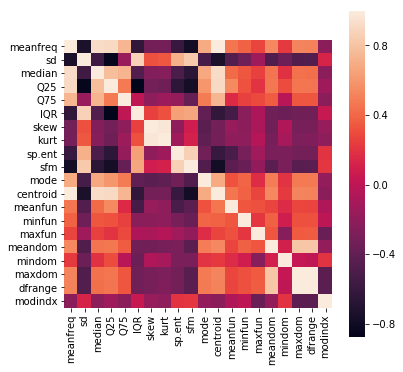

In [54]:
correlation = data.corr()
f, ax = plt.subplots(figsize = (6,6))
seaborn.heatmap(correlation, square = True)
plt.show()

In [77]:
df = data
df = df.drop(['label'],axis = 1)
X = df.values
y = data['label'].values

# only one column has object type so we encode it

encoder = LabelEncoder()
y = encoder.fit_transform(y)
#print(y)


# convert srting data into numberic eg. male 1, female 0
df1 = data
df1 = df1.drop(['label'],axis = 1)
X1 = df1.values
y1 = data['label'].values

# only one column has object type so we encode it

encoder = LabelEncoder()
y1 = encoder.fit_transform(y)

X_train,X_test,y_train,y_test =  train_test_split(X1, y1, test_size=0.2, random_state=1)


#KNN Implementation
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred2 = clf.predict(X_test)
print('KNN without Preprocessed Data:',metrics.accuracy_score(y_test, y_pred2))

print('============After performing The StandardScaler As preprocessing of data============')
scaler = StandardScaler()
scaler.fit(X1)
X1 = scaler.transform(X1)
print(X1)

X_train,X_test,y_train,y_test =  train_test_split(X1, y1, test_size=0.1, random_state=1)
#KNN Implementation
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred2 = clf.predict(X_test)
print('KNN with Preprocessed data:',metrics.accuracy_score(y_test, y_pred2))


KNN without Preprocessed Data: 0.722397476340694
============After performing The StandardScaler As preprocessing of data============
[[-4.04924806  0.4273553  -4.22490077 ... -1.43142165 -1.41913712
  -1.45477229]
 [-3.84105325  0.6116695  -3.99929342 ... -1.41810716 -1.4058184
  -1.01410294]
 [-3.46306647  1.60384791 -4.09585052 ... -1.42920257 -1.41691733
  -1.06534356]
 ...
 [-1.29877326  2.32272355 -0.05197279 ... -0.5992661  -0.58671739
   0.17588664]
 [-1.2452018   2.012196   -0.01772849 ... -0.41286326 -0.40025537
   1.14916112]
 [-0.51474626  2.14765111 -0.07087873 ... -1.27608595 -1.2637521
   1.47567886]]
KNN with Preprocessed data: 0.9936908517350158
